<a href="https://colab.research.google.com/github/femiraj26/Titanic_survival_predication/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LOAD AND EXPLORING THE DATASET


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/tested.csv")  # adjust path if different

# View shape and first few rows
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:\n", df.head())

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Summary info
print("\nData types and structure:")
df.info()


Dataset Shape: (418, 12)

First 5 rows:
    PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  

Missing values:
 PassengerId      0
Survived

DATA PREPROCESSING

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv('/content/tested.csv')

# Drop unnecessary columns
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Separate features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Handle categorical features
cat_features = X.select_dtypes(include='object').columns
num_features = X.select_dtypes(exclude='object').columns

# Impute and encode categorical features
for col in cat_features:
    X[col] = SimpleImputer(strategy='most_frequent').fit_transform(X[[col]]).ravel()
    X[col] = LabelEncoder().fit_transform(X[col])

# Impute and scale numerical features
X[num_features] = SimpleImputer(strategy='mean').fit_transform(X[num_features])
X[num_features] = StandardScaler().fit_transform(X[num_features])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Preprocessing completed.")


✅ Preprocessing completed.


MODEL TRAINING

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Load dataset
df = pd.read_csv('/content/tested.csv')

# Drop unnecessary columns
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Separate features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Handle categorical features
cat_features = X.select_dtypes(include='object').columns
num_features = X.select_dtypes(exclude='object').columns

# Impute and encode categorical features
for col in cat_features:
    X[col] = SimpleImputer(strategy='most_frequent').fit_transform(X[[col]]).ravel()
    X[col] = LabelEncoder().fit_transform(X[col])

# Impute and scale numerical features
X[num_features] = SimpleImputer(strategy='mean').fit_transform(X[num_features])
X[num_features] = StandardScaler().fit_transform(X[num_features])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models to train
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42)
}

# Train each model
trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model
print("✅ Model training completed.")



✅ Model training completed.


MODEL EVALUATION AND RESULT

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

# Initialize variables to track the best model
best_model = None
best_cv_score = -1  # Start with a very low score

# Evaluate Logistic Regression
log_model = trained_models["Logistic Regression"]
y_pred_log = log_model.predict(X_test)

print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print("F1 Score:", f1_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

# Logistic Regression Cross-validation accuracy
log_cv_scores = cross_val_score(log_model, X, y, cv=5)
log_cv_mean = log_cv_scores.mean()
print(f"Logistic Regression Cross-Validation Accuracy: {log_cv_mean:.4f}")

# Check if it's the best model so far
if log_cv_mean > best_cv_score:
    best_cv_score = log_cv_mean
    best_model = "Logistic Regression"

# Evaluate other models
for name, model in trained_models.items():
    if name != "Logistic Regression":
        y_pred = model.predict(X_test)

        print(f"\n=== {name} ===")
        print("Accuracy:", accuracy_score(y_test, y_pred))
        print("Precision:", precision_score(y_test, y_pred))
        print("Recall:", recall_score(y_test, y_pred))
        print("F1 Score:", f1_score(y_test, y_pred))
        print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
        print("Classification Report:\n", classification_report(y_test, y_pred))

        # Cross-validation scores
        scores = cross_val_score(model, X, y, cv=5)
        cv_mean = scores.mean()
        print(f"{name} Cross-Validation Accuracy: {cv_mean:.4f}")

        # Check if it's the best model so far
        if cv_mean > best_cv_score:
            best_cv_score = cv_mean
            best_model = name

# Display the best model
print(f"\nThe best model based on Cross-Validation Accuracy is: {best_model} with a CV Accuracy of {best_cv_score:.4f}")


=== Logistic Regression ===
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[50  0]
 [ 0 34]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

Logistic Regression Cross-Validation Accuracy: 1.0000

=== Decision Tree ===
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[50  0]
 [ 0 34]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

Decisio

## DATA VISUALIZATION

CORRELATION HEATMAP

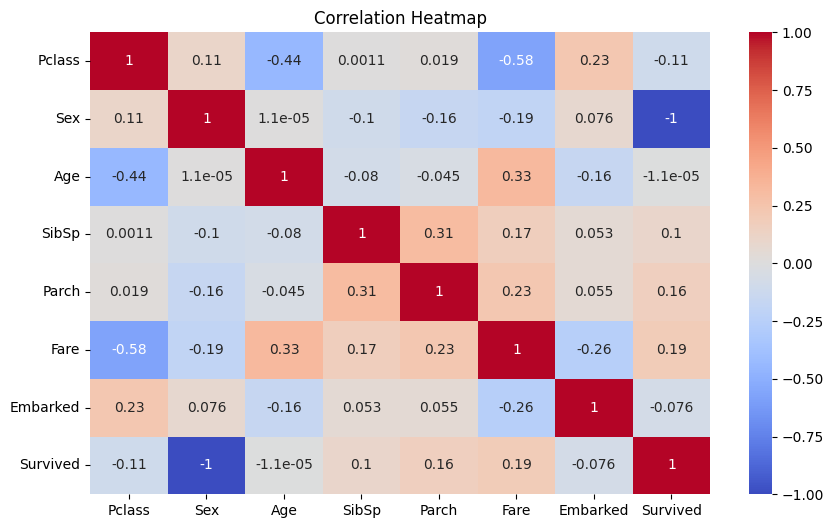

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add the target column temporarily
temp_df = X.copy()
temp_df['Survived'] = y

# Check correlation
plt.figure(figsize=(10,6))
sns.heatmap(temp_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


SCATTER PLOT

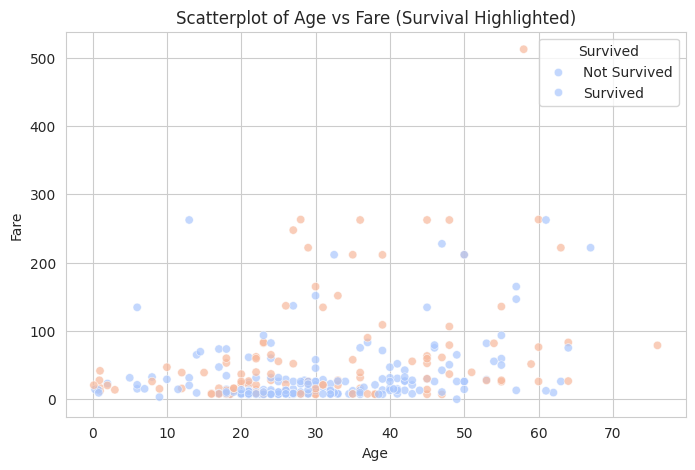

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style('whitegrid')

# Scatterplot of Age vs Fare, colored by Survival
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Age'], y=df['Fare'], hue=df['Survived'], palette='coolwarm', alpha=0.7)
plt.title('Scatterplot of Age vs Fare (Survival Highlighted)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()


COUNT PLOT

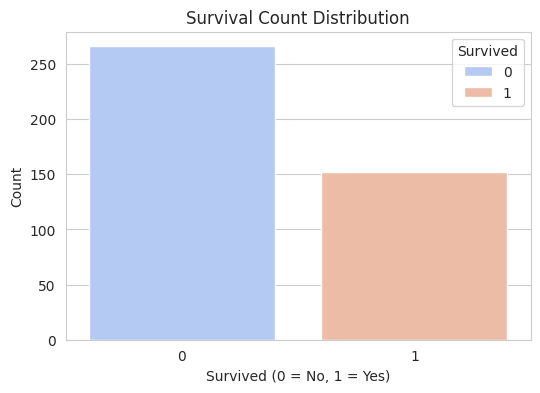

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/content/tested.csv')

# Set style
sns.set_style('whitegrid')

# Survival count plot
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df, palette='coolwarm', hue='Survived')
plt.title('Survival Count Distribution')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


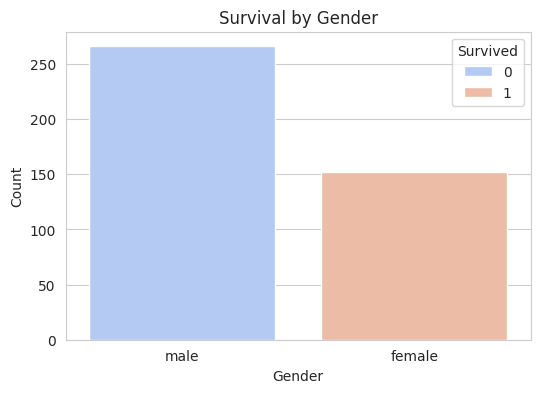

In [ ]:
# Survival count by gender
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=df, palette='coolwarm')
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()
